In [34]:
#https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap
import statistics as stat
import numpy as np
import pandas as pd
import Helper_Function as hf #File with custom-built functions
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="darkgrid")

file_path_1 = '/Users/andrewmartinez/Documents/MBD/Machine Learning II/Group Project/Labels.csv'
file_path_2 = '/Users/andrewmartinez/Documents/MBD/Machine Learning II/Group Project/Train.csv'

#Dataiku nulls out amount_tsv, need to keep original set
file_path_3 = '/Users/andrewmartinez/Documents/MBD/Machine Learning II/Group Project/Train_prepared.csv'

labels = hf.read_data(file_path_1)
raw_df = hf.read_data(file_path_2)

#External Data
pop_df = pd.read_excel('External_features.xls', sheet_name = 0)
weather_df = pd.read_excel('External_features.xls', sheet_name = 1)

raw_df.describe(include = 'all')

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,59400.000000,59400.000000,59400,59400,59400.000000,59400,59400.000000,5.940000e+04,59400,59400.000000,...,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,NaN,NaN,356,1898,NaN,2146,NaN,NaN,37400,NaN,...,7,8,6,5,5,10,7,3,7,6
top,NaN,NaN,3/15/11,Government Of Tanzania,NaN,DWE,NaN,NaN,none,NaN,...,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
freq,NaN,NaN,572,9084,NaN,17402,NaN,NaN,3563,NaN,...,25348,50818,50818,33186,33186,17021,17021,45794,28522,34625
mean,37115.131768,317.650385,NaN,NaN,668.297239,NaN,34.077427,-5.706033e+00,NaN,0.474141,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,21453.128371,2997.574558,NaN,NaN,693.116350,NaN,6.567432,2.946019e+00,NaN,12.236230,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,0.000000,NaN,NaN,-90.000000,NaN,0.000000,-1.164944e+01,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,18519.750000,0.000000,NaN,NaN,0.000000,NaN,33.090347,-8.540621e+00,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,37061.500000,0.000000,NaN,NaN,369.000000,NaN,34.908743,-5.021597e+00,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,55656.500000,20.000000,NaN,NaN,1319.250000,NaN,37.178387,-3.326156e+00,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
raw_df = raw_df.drop('date_recorded', axis = 1)
clean_df = hf.read_data(file_path_3)
cols = ['id', 'date_recorded', 'Year', 'Month', 'Day', 'Day_of_week']
dates = clean_df[cols]
dates_df = pd.merge(dates, raw_df, how = 'inner', on ='id') 
dates_df.head()

,id,date_recorded,Year,Month,Day,Day_of_week,amount_tsh,funder,gps_height,installer,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,2011-03-14T00:00:00.000Z,2011,3,14,1,6000.0,Roman,1390,Roman,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,2013-03-06T00:00:00.000Z,2013,3,6,3,0.0,Grumeti,1399,GRUMETI,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,2013-02-25T00:00:00.000Z,2013,2,25,1,25.0,Lottery Club,686,World vision,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,2013-01-28T00:00:00.000Z,2013,1,28,1,0.0,Unicef,263,UNICEF,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,2011-07-13T00:00:00.000Z,2011,7,13,3,0.0,Action In A,0,Artisan,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [36]:
initial_df = pd.merge(labels, dates_df, how = 'inner', on ='id') 
initial_df.head()

,id,status_group,date_recorded,Year,Month,Day,Day_of_week,amount_tsh,funder,gps_height,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,2011-03-14T00:00:00.000Z,2011,3,14,1,6000.0,Roman,1390,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,2013-03-06T00:00:00.000Z,2013,3,6,3,0.0,Grumeti,1399,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,2013-02-25T00:00:00.000Z,2013,2,25,1,25.0,Lottery Club,686,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,2013-01-28T00:00:00.000Z,2013,1,28,1,0.0,Unicef,263,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,2011-07-13T00:00:00.000Z,2011,7,13,3,0.0,Action In A,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [37]:
#Scale the status variable
analysis_df = hf.categorical_to_scale(initial_df, 'status_group')
analysis_df.head()

,id,status_group,date_recorded,Year,Month,Day,Day_of_week,amount_tsh,funder,gps_height,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,func_band
0,69572,functional,2011-03-14T00:00:00.000Z,2011,3,14,1,6000.0,Roman,1390,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,2
1,8776,functional,2013-03-06T00:00:00.000Z,2013,3,6,3,0.0,Grumeti,1399,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2
2,34310,functional,2013-02-25T00:00:00.000Z,2013,2,25,1,25.0,Lottery Club,686,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,2
3,67743,non functional,2013-01-28T00:00:00.000Z,2013,1,28,1,0.0,Unicef,263,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,0
4,19728,functional,2011-07-13T00:00:00.000Z,2011,7,13,3,0.0,Action In A,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2


# Lat/Long

In [38]:
# Extract the data we're interested in
lat = analysis_df['latitude'].values
lon = analysis_df['longitude'].values
amount = analysis_df['amount_tsh'].values
population = analysis_df['population'].values
target = analysis_df['func_band'].values

lat_med = stat.median(analysis_df['latitude'].values)
lon_med = stat.median(analysis_df['longitude'].values)

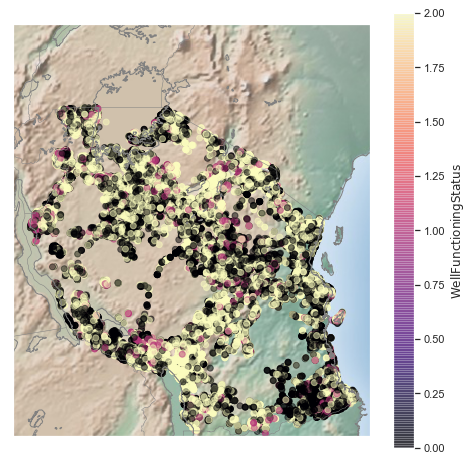

In [78]:
# 1. Draw the map background
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution='h', 
            lat_0=lat_med, lon_0=lon_med,
            width=1.3E6, height=1.5E6)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting well status
m.scatter(lon, lat, latlon=True, c=target, cmap = 'magma', alpha=0.5)

# 3. create colorbar and legend
plt.colorbar(label=r'$\rm Well Functioning Status}$')
plt.clim(0, 2)

# WPT

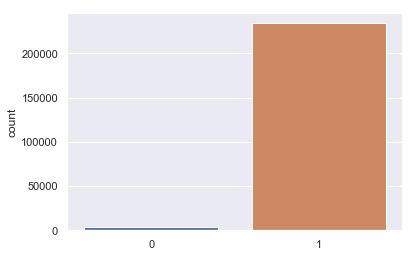

In [51]:
empty_wpt = [0 if x == 'none' else 1 for x in analysis_df['wpt_name']]
analysis_df['empty_wpt'] = empty_wpt
sns.countplot(empty_wpt)

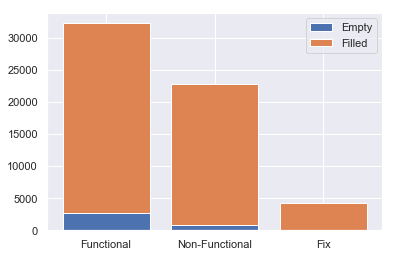

In [76]:
#hf.density_plot(analysis_df, 'empty_wpt', lower_bound = 0, upper_bound = 1)
N = 3

empty_func = len(analysis_df[(analysis_df['empty_wpt'] == 0) & (analysis_df['func_band'] == 2)])
empty_non_func = len(analysis_df[(analysis_df['empty_wpt'] == 0) & (analysis_df['func_band'] == 0)])
empty_fix = len(analysis_df[(analysis_df['empty_wpt'] == 0) & (analysis_df['func_band'] == 1)])
filled_func = len(analysis_df[(analysis_df['empty_wpt'] == 1) & (analysis_df['func_band'] == 2)])
filled_non_func = len(analysis_df[(analysis_df['empty_wpt'] == 1) & (analysis_df['func_band'] == 0)])
filled_fix = len(analysis_df[(analysis_df['empty_wpt'] == 1) & (analysis_df['func_band'] == 1)])
ind = np.arange(N)
empty = (empty_func, empty_non_func, empty_fix)
filled = (filled_func, filled_non_func, filled_fix)

p1 = plt.bar(ind, empty)
p2 = plt.bar(ind, filled,bottom=empty)
plt.xticks(ind, ('Functional', 'Non-Functional', 'Fix'))
plt.legend((p1[0], p2[0]), ('Empty', 'Filled'))

# Num Private

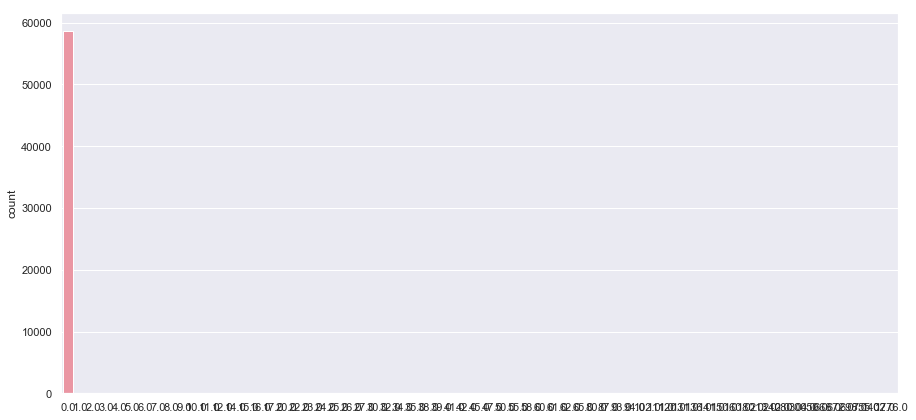

In [88]:
empty_num_private = [-1 if x == '' else x for x in analysis_df['num_private']]

plt.figure(figsize=(15,7)) 
sns.countplot(empty_num_private)

# Basin

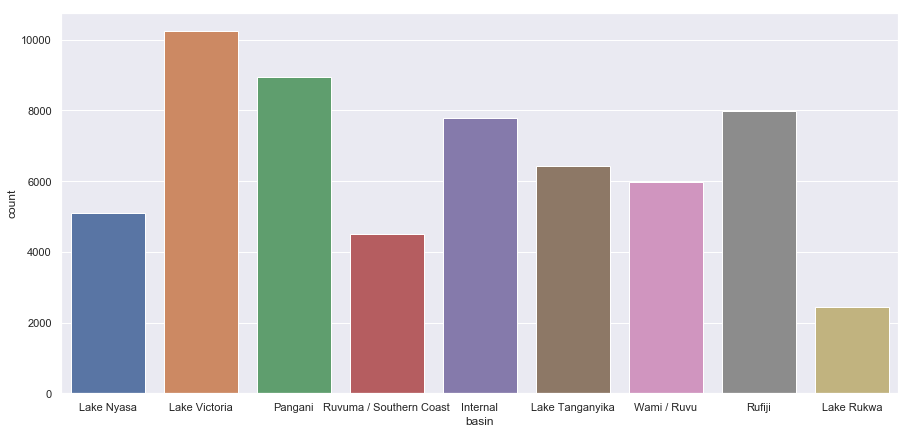

In [90]:
plt.figure(figsize=(15,7))
sns.countplot(analysis_df['basin'])

In [94]:
reduced_cat = ['basin', 'subvillage', 'region', 'region_code', 'district_code']

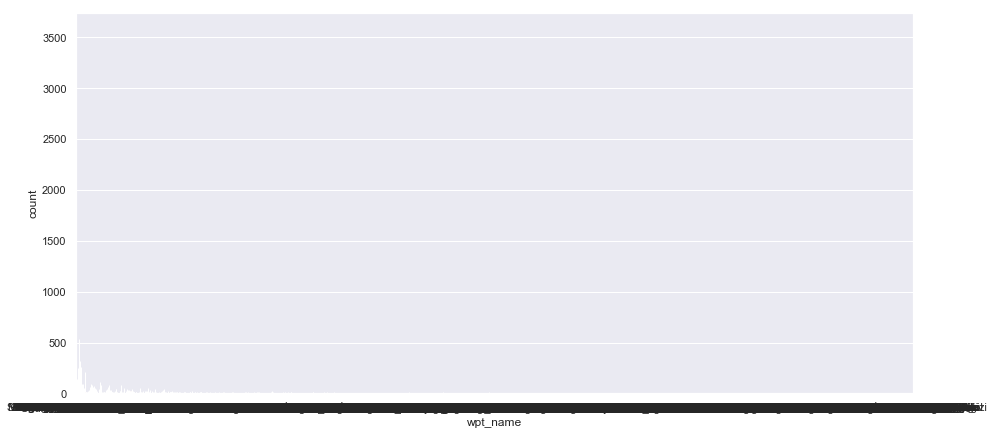

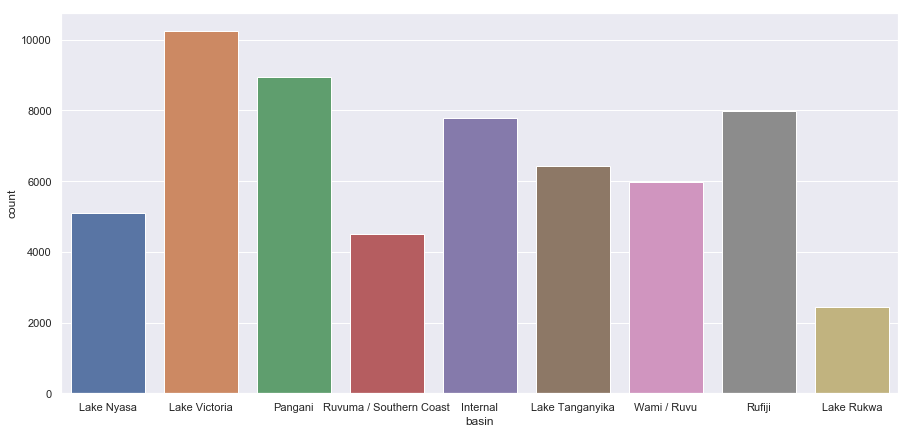

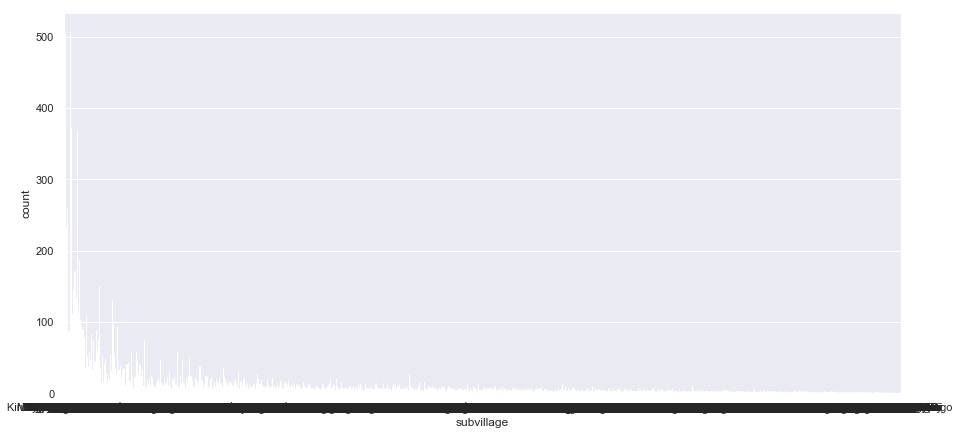

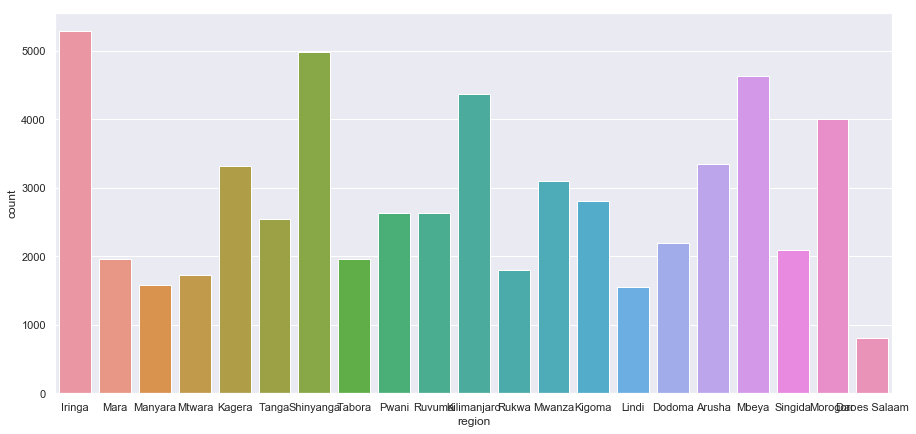

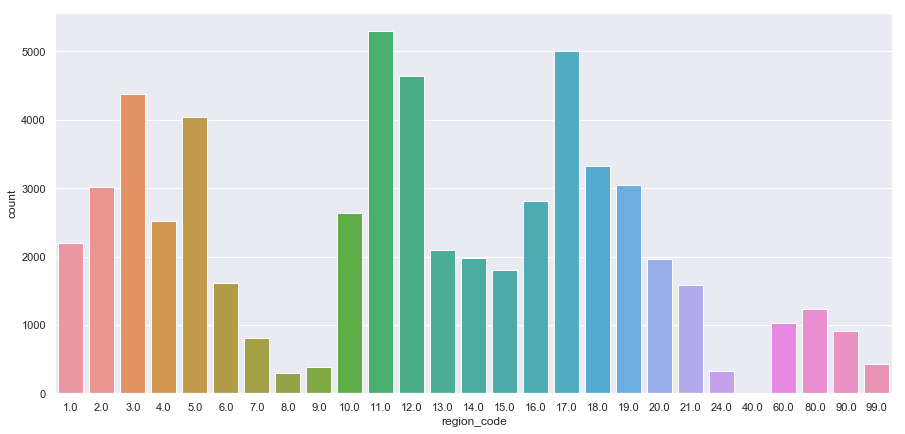

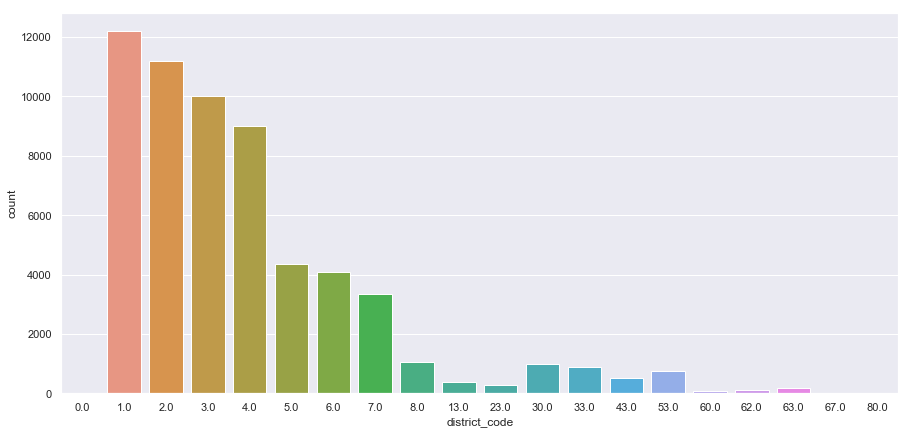

In [96]:
for col in range(0, len(reduced_cat)):
    hf.categorical_plot(analysis_df, reduced_cat, col) 

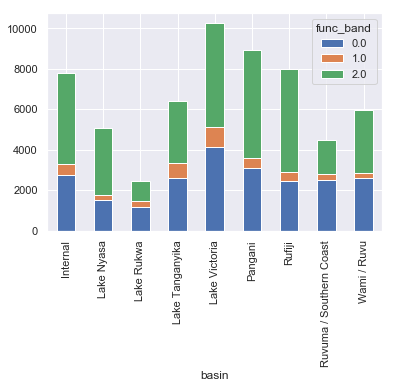

In [103]:
df_plot = analysis_df.groupby(['func_band', 'basin']).size().reset_index().pivot(columns=
                                            'func_band', index='basin', values=0)
df_plot.plot(kind = 'bar', stacked = True)

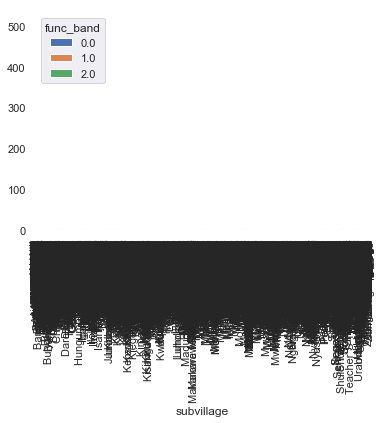

In [104]:
df_plot = analysis_df.groupby(['func_band', 'subvillage']).size().reset_index().pivot(columns=
                                            'func_band', index='subvillage', values=0)
df_plot.plot(kind = 'bar', stacked = True)

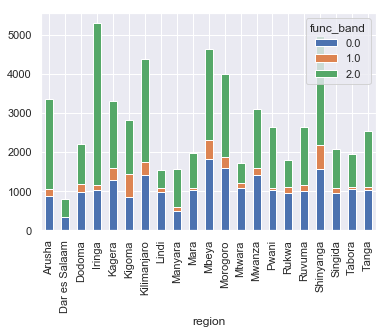

In [105]:
df_plot = analysis_df.groupby(['func_band', 'region']).size().reset_index().pivot(columns=
                                            'func_band', index='region', values=0)
df_plot.plot(kind = 'bar', stacked = True)

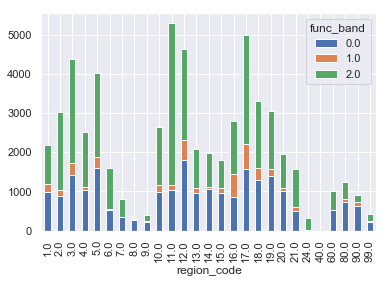

In [106]:
df_plot = analysis_df.groupby(['func_band', 'region_code']).size().reset_index().pivot(columns=
                                            'func_band', index='region_code', values=0)
df_plot.plot(kind = 'bar', stacked = True)

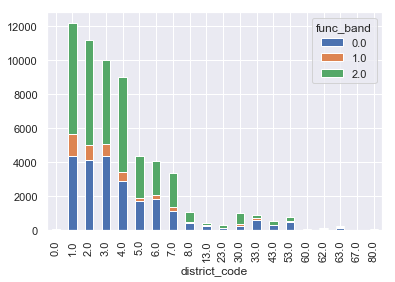

In [108]:
df_plot = analysis_df.groupby(['func_band', 'district_code']).size().reset_index().pivot(columns=
                                            'func_band', index='district_code', values=0)
df_plot.plot(kind = 'bar', stacked = True)